In [100]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import tree
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


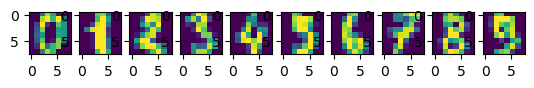

In [86]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

digits = load_digits()

df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [91]:
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6440049443757726


## Evaluation de l'exactitude du modèle 
Une boucle for est utilisée pour entraîner et évaluer l'accuracy de notre modèle. A chaque boucle, la valeur de l'accuracy est ajouter à la liste `accuracies`. On peut ensuite calculer la moyenne et l'écart type (avec np.std pour "standard deviation") des valeurs présentes dans `accuracies`.

Après 100 itérations, moyenne accuracy = 0.85, écart type = 0,033

Si on considère une distribution normale = ([Khan Academy](https://fr.khanacademy.org/math/be-6eme-secondaire2h2/xa29f433c00318f09:variables-aleatoires-et-lois-de-probabilites/xa29f433c00318f09:variable-aleatoire-continue-loi-normale/a/basic-normal-calculations) - Lorsque la distribution des individus dans une population obéit à la loi normale,approximativement, les valeurs de accuracy vont se retrouver avec une probabilité de 99.7%) dans une fourchette de ±3σ autour de la moyenne, ce qui donne une intervalle de variation de 6σ=0.24=24%.

In [106]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))

print(np.mean(accuracies), np.std(accuracies))

0.8650000000000001 0.03349497843329524


In [93]:
accuracies = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
bagging_clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)
bagging_clf.fit(X_train, y_train)
Z = bagging_clf.predict(X_test)
accuracy=bagging_clf.score(X_test,y_test)

nan nan


c:\Users\pault\anaconda3\envs\random_forest\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\pault\anaconda3\envs\random_forest\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\pault\anaconda3\envs\random_forest\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\pault\anaconda3\envs\random_forest\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\pault\anaconda3\envs\random_forest\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


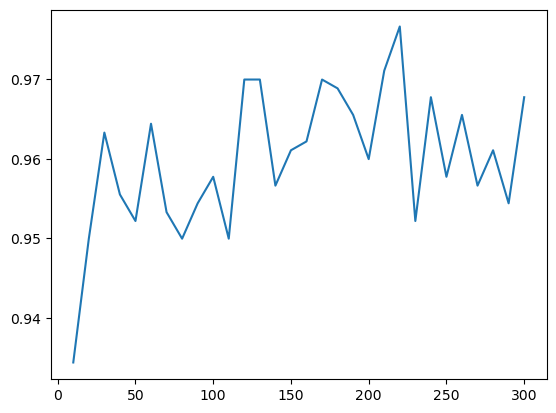

In [94]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

print(np.mean(accuracies), np.std(accuracies))

plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [95]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8],
        "random_state" : [42]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9694444444444444
max_samples: 0.8
max_features: 0.4


# Random forests
L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le bagging, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu. Les deux objets Python qui implémentent les forêts aléatoires sont RandomForestClassifier et RandomForestRegressor. Les paramètres les plus importants sont :

- n_estimators : integer, optional (default=10). Le nombre d’arbres.

- max_features : le nombre d’attributs à considérer à chaque split.

- max_samples : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.

- min_samples_leaf : le nombre minimal d’éléments dans un nœud feuille.

- oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).



In [99]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

## Utilisation de la méthode d'ensemble RandomForestClassifier pour entraîner notre modèle

In [101]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [105]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.911619283065513


## Comparaison Bagging et Random Forest

In [108]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.8777777777777778
Bagging (200 arbres) : 0.9666666666666667
Forêt aléatoire (200 arbres) : 0.9666666666666667


In [116]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9311457174638488 0.01016383342515004
0.9573971078976641 0.004394826755314431


Nous avons donc non seulement un plus faible taux moyen d’erreurs, mais aussi une variance plus faible.

0.9329143492769744 0.011216182044929955
0.9595439377085649 0.00604088432921754

10 0.9243604004449388
20 0.9532814238042269
30 0.9610678531701891
40 0.96440489432703
50 0.96440489432703
60 0.9666295884315906
70 0.9733036707452726
80 0.9710789766407119
90 0.9699666295884316
100 0.9688542825361512
110 0.9733036707452726
120 0.9733036707452726
130 0.9733036707452726
140 0.9721913236929922
150 0.9710789766407119
160 0.9733036707452726
170 0.9688542825361512
180 0.9710789766407119
190 0.9744160177975528
200 0.9721913236929922
210 0.9721913236929922
220 0.967741935483871
230 0.9710789766407119
240 0.9733036707452726
250 0.9666295884315906
260 0.9699666295884316
270 0.9710789766407119
280 0.9710789766407119
290 0.9721913236929922
300 0.9733036707452726


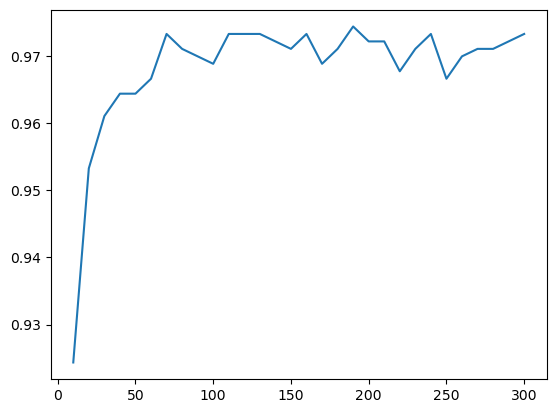

In [117]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

A partir de n_estimators = 70 le résultat commence à osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

## Extra trees Vs. Random Forest
Les Extra-Trees (Extremely Randomized Trees) randomisent encore plus la construction de l’arbre et sont utilisés surtout pour **des données numériques**. Par rapport aux forêts aléatoires, **ils abandonnent l’utilisation des échantillons de bootstrap et pour chaque feature candidat choisissent un seuil de coupure aléatoire**. L’idée fonctionne plutôt bien pour de problèmes d’apprentissage qui ont un grand nombre de features qui varient de manière continue. **Souvent leur taux d’erreur est supérieur aux forêts aléatoires, le temps de calcul plus faible et les arbres générés sont plus grands.**

In [123]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=70)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=70)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9688542825361512
Extra Trees : 0.978865406006674


In [126]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

c:\Users\pault\anaconda3\envs\random_forest\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.896168108776267


max_depth faible génère des arbres peu profonds qui ont tendance à généraliser mal. max_depth élevé génère des arbres trop profonds (sur-apprentissage) d’où encore une mauvaise généralisation :

`(max_dept, accuracy) : (2, 0.70), (3, 0.85), (4, 0.87), (5, 0.89), (10, 0.95), (15, 0.80)`

Par contre, un mauvais classifieur faible (par exemple max_depth = 2) peut etre compensé par un parametre n_estimators plus grand : 
`n_estimators = 30 donne accuracy = 0.85, n_estimators = 300 donne accuracy = 0.95.`

Une valeur plus faible de learning_rate permet d’améliorer le score, mais pas au-delà d’une certaine valeur : 
`learning_rate = 2 donne accuracy = 0.89, learning_rate = 0.1 donne accuracy = 0.93 mais learning_rate = 0.1 ne change plus le taux d’erreurs.`